# Name : Muhammad Adil
## Domain : Data Science and Business Analytics
## Task1 : Student score prediction using Supervised Machine Learning 

### importing all the relevant libraries

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### loading the dataset

In [43]:
data = pd.read_csv("http://bit.ly/w-data")

### inspecting the data

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


#### there is no missing value 

In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### visualizing the data

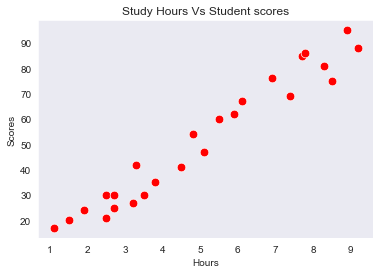

In [7]:
sns.set_style("dark")
sns.scatterplot(data = data, x = 'Hours', y = 'Scores', s= 75, marker = 'o', color = 'red').set(title ='Study Hours Vs Student scores')
plt.show()

##### it can be seen from the scatter plot that there exist a linear relationship between hours studied and obtained marks

### extracting feature and target variable from the dataset

In [8]:
x = data.iloc[:, :-1].values
y = data.iloc[:,1].values

### spliting the data into train and test set

In [9]:
from sklearn.model_selection import train_test_split 

In [10]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

### training the model using linear regression

In [11]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

### plotting the regression line

In [12]:
m=lr.coef_
c=lr.intercept_
print('The co-efficients is',m)
print('The intercept is',c)

The co-efficients is [9.68207815]
The intercept is 2.826892353899737


In [13]:
line_equation=m*x+c
line_equation

array([[27.03208774],
       [52.20549094],
       [33.80954245],
       [85.12455667],
       [36.71416589],
       [17.35000959],
       [91.90201137],
       [56.0783222 ],
       [83.18814104],
       [28.96850337],
       [77.37889414],
       [59.95115347],
       [46.39624405],
       [34.77775026],
       [13.47717832],
       [88.99738793],
       [27.03208774],
       [21.22284085],
       [61.8875691 ],
       [74.4742707 ],
       [28.96850337],
       [49.3008675 ],
       [39.61878934],
       [69.63323162],
       [78.34710196]])

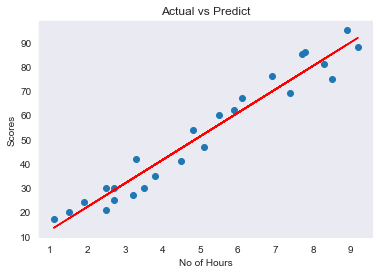

In [14]:
plt.scatter(x,y)
plt.plot(x,line_equation,color='red')
plt.title('Actual vs Predict')
plt.xlabel('No of Hours')
plt.ylabel('Scores')
plt.show()


In [40]:
y_pred=lr.predict(X_test)

In [41]:
new_data=pd.DataFrame({'Actual':y_test,'Predict':y_pred})
new_data

,Actual,Predict
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


### actual task

In [42]:
Hours_studied=[[9.25]]
result = lr.predict(Hours_studied)
print('Students who study {0}  hours per day,they secure {1} marks' .format(Hours_studied, result[0]))

Students who study [[9.25]]  hours per day,they secure 92.38611528261494 marks


### evaluating the model

In [39]:
from sklearn import metrics
print('Mean Absolute Error :',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error is :',metrics.mean_squared_error(y_test,y_pred))
print('Root of Mean Squared Error :',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error : 3.9207511902099244
Mean Squared Error is : 18.943211722315272
Root of Mean Squared Error : 4.352380006653288
